In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from imblearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, confusion_matrix

# 결측치처리 + 인코딩 / 스케일링 간
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import silhouette_samples, silhouette_score
# 불균형 데이터 처리
from imblearn.over_sampling import SMOTE
from sklearn.compose import make_column_transformer

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from yellowbrick.cluster import SilhouetteVisualizer
import joblib

import matplotlib
matplotlib.rc('font',family = 'NanumGothic')
matplotlib.rc('axes', unicode_minus = False)

In [51]:
df_k = pd.read_csv('./RFM_data.csv')

/tmp/ipykernel_22241/2706822594.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_k = pd.read_csv('./RFM_data.csv')


In [52]:
df_k

,index_x,고객번호,최근구매일,날짜,구매횟수,총결제금액,index_y,recendancy,frequency,monetary,rfm
0,0,201901010750089,2020-12-31,585,1,43825,0,0,0,6,GOLD
1,1,201901010750143,2020-12-31,585,1,43825,1,0,0,6,GOLD
2,2,201812310749820,2021-08-20,353,5,219351,2,4,8,10,DIAMOND
3,3,201812310750007,2021-02-19,535,2,59171,3,0,2,6,GOLD
4,4,201812310749977,2020-12-31,585,1,30066,4,0,0,4,SILVER
...,...,...,...,...,...,...,...,...,...,...,...
81344,97718,201912161045437,2022-08-07,1,1,27286,97718,10,0,4,PLATINUM
81345,97719,201911181032894,2022-08-07,1,1,30520,97719,10,0,4,PLATINUM
81346,97720,201912171047083,2022-08-07,1,1,18400,97720,10,0,4,PLATINUM
81347,97721,201901280778029,2022-08-07,1,1,15540,97721,10,0,4,PLATINUM


In [53]:
df_s = pd.read_csv('./Sales_data_RMF.csv')

/tmp/ipykernel_22241/922523283.py:1: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_s = pd.read_csv('./Sales_data_RMF.csv')


In [54]:
df_s[df_s['상품명']=='하기스 NEW 네이처메이드 썸머팬티 4단계 공용 82매(팬티형) X 2']

,주문번호,배송완료일,배송시작일,구매일,구매시월령,고객번호,구매금액,결제금액,물품대분류,상품명,포인트,배송준비시간,배송시간,물품중분류,물품소분류
183391,00516134107-70831244127999,2022-05-22,2022-05-17,2022-05-16,8,201906230924333,119402,119402,팬티,하기스 NEW 네이처메이드 썸머팬티 4단계 공용 82매(팬티형) X 2,0,1 days,5 days,기저귀,팬티형
183395,00515235902-00293864132708,2022-05-19,2022-05-17,2022-05-16,18,201907020931850,119402,119402,팬티,하기스 NEW 네이처메이드 썸머팬티 4단계 공용 82매(팬티형) X 2,0,1 days,2 days,기저귀,팬티형
183402,00515195429-21769217166533,2022-05-19,2022-05-17,2022-05-16,8,201909240989667,119402,119402,팬티,하기스 NEW 네이처메이드 썸머팬티 4단계 공용 82매(팬티형) X 2,0,1 days,2 days,기저귀,팬티형
183582,00516222242-5774670738004,2022-05-21,2022-05-18,2022-05-17,12,201902100792951,119402,119402,팬티,하기스 NEW 네이처메이드 썸머팬티 4단계 공용 82매(팬티형) X 2,0,1 days,3 days,기저귀,팬티형
188543,00622111142-96473654154972,2022-06-25,2022-06-23,2022-06-22,16,201908230967934,119402,119402,팬티,하기스 NEW 네이처메이드 썸머팬티 4단계 공용 82매(팬티형) X 2,0,1 days,2 days,기저귀,팬티형
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199797,00805193713-94086968111694,2022-08-09,2022-08-07,2022-08-06,12,201905220899045,119402,119402,팬티,하기스 NEW 네이처메이드 썸머팬티 4단계 공용 82매(팬티형) X 2,0,1 days,2 days,기저귀,팬티형
199799,00805192729-61899007171853,2022-08-12,2022-08-07,2022-08-06,10,201910081000873,119402,119402,팬티,하기스 NEW 네이처메이드 썸머팬티 4단계 공용 82매(팬티형) X 2,0,1 days,5 days,기저귀,팬티형
199800,00805165802-72496874191582,2022-08-10,2022-08-07,2022-08-06,8,201912071041333,119402,119402,팬티,하기스 NEW 네이처메이드 썸머팬티 4단계 공용 82매(팬티형) X 2,0,1 days,3 days,기저귀,팬티형
199955,00806151345-1101965299282,2022-08-10,2022-08-08,2022-08-07,14,201904280879922,119402,119402,팬티,하기스 NEW 네이처메이드 썸머팬티 4단계 공용 82매(팬티형) X 2,0,1 days,2 days,기저귀,팬티형


In [55]:
# k = 3
# model = KMeans(n_clusters = k, random_state = 10)

In [56]:
df_k['rfm'].value_counts()

SILVER      34755
GOLD        24282
PLATINUM    14047
DIAMOND      8265
Name: rfm, dtype: int64

In [57]:
df_k['날짜'].mean()

326.4781128225301

In [58]:
grouped = df_k.groupby("rfm")

# 그룹별 1인당 결제금액과 1인당 재구매횟수 계산
result = grouped.apply(lambda x: pd.Series({
    "1인당 결제금액": x["총결제금액"].sum() / x["고객번호"].nunique(),
    "1인당 재구매횟수": x["구매횟수"].sum() / x["고객번호"].nunique(),
     "구매일로부터 평균기간": x["날짜"].sum() / x["고객번호"].nunique()
}))

# 결과 출력
print(result)

               1인당 결제금액  1인당 재구매횟수  구매일로부터 평균기간
rfm                                            
DIAMOND   155525.587901   4.538173   180.969268
GOLD       28639.528004   1.369121   300.091796
PLATINUM   58309.575212   2.058945   236.518758
SILVER     12281.551403   1.070839   415.875385


In [87]:
df_p = df_k[df_k['rfm']=='PLATINUM']
df_p[df_p['날짜']<=90]

,index_x,고객번호,최근구매일,날짜,구매횟수,총결제금액,index_y,recendancy,frequency,monetary,rfm
69142,69306,201902010785902,2022-08-01,7,2,10890,69306,10,2,2,PLATINUM
69434,69837,201910241018509,2022-07-01,38,2,9760,69837,10,2,2,PLATINUM
69505,69950,201912171047084,2022-06-27,42,2,12281,69950,10,2,2,PLATINUM
69532,70014,201903010820009,2022-06-24,45,2,11770,70014,10,2,2,PLATINUM
69540,70031,201910221016137,2022-06-22,47,2,12288,70031,10,2,2,PLATINUM
...,...,...,...,...,...,...,...,...,...,...,...
81344,97718,201912161045437,2022-08-07,1,1,27286,97718,10,0,4,PLATINUM
81345,97719,201911181032894,2022-08-07,1,1,30520,97719,10,0,4,PLATINUM
81346,97720,201912171047083,2022-08-07,1,1,18400,97720,10,0,4,PLATINUM
81347,97721,201901280778029,2022-08-07,1,1,15540,97721,10,0,4,PLATINUM


In [84]:
df_d = df_k[df_k['rfm']=='DIAMOND']

In [86]:
df_d[df_d['날짜']<=90]

,index_x,고객번호,최근구매일,날짜,구매횟수,총결제금액,index_y,recendancy,frequency,monetary,rfm
68934,68934,201912191053483,2022-07-09,30,2,30578,68934,10,2,4,DIAMOND
68949,68949,201912201054217,2022-06-16,53,2,41269,68949,10,2,4,DIAMOND
68967,68979,201902010786182,2022-06-28,41,3,28674,68979,10,4,4,DIAMOND
68970,68994,201908010952171,2022-06-30,39,2,14930,68994,10,2,4,DIAMOND
68992,69019,201912071041503,2022-07-25,14,8,281715,69019,10,10,10,DIAMOND
...,...,...,...,...,...,...,...,...,...,...,...
81312,97672,201905150892791,2022-08-06,2,1,48388,97672,10,0,6,DIAMOND
81325,97690,201901290779464,2022-08-06,2,1,119370,97690,10,0,8,DIAMOND
81336,97706,201911051026236,2022-08-07,1,1,95902,97706,10,0,6,DIAMOND
81337,97707,201902220809806,2022-08-07,1,1,48388,97707,10,0,6,DIAMOND


In [60]:
df_k['고객번호'].nunique()

81349

In [61]:
df_k.isnull().sum()

index_x       0
고객번호          0
최근구매일         0
날짜            0
구매횟수          0
총결제금액         0
index_y       0
recendancy    0
frequency     0
monetary      0
rfm           0
dtype: int64

In [96]:
df_t = df_k[df_k['날짜']<=365]

우리 고객의 이탈률은 0.375이므로 이탈률이 35% 감소하면 (이탈률은 0.244)  남은 고객의 51008명 0.131%의 고객의 매출을 노릴 수있다.
그 금액은 316,403,704원

In [98]:
df_t['총결제금액'].sum()

2415295458

In [95]:
df_k

,index_x,고객번호,최근구매일,날짜,구매횟수,총결제금액,index_y,recendancy,frequency,monetary,rfm
0,0,201901010750089,2020-12-31,585,1,43825,0,0,0,6,GOLD
1,1,201901010750143,2020-12-31,585,1,43825,1,0,0,6,GOLD
2,2,201812310749820,2021-08-20,353,5,219351,2,4,8,10,DIAMOND
3,3,201812310750007,2021-02-19,535,2,59171,3,0,2,6,GOLD
4,4,201812310749977,2020-12-31,585,1,30066,4,0,0,4,SILVER
...,...,...,...,...,...,...,...,...,...,...,...
81344,97718,201912161045437,2022-08-07,1,1,27286,97718,10,0,4,PLATINUM
81345,97719,201911181032894,2022-08-07,1,1,30520,97719,10,0,4,PLATINUM
81346,97720,201912171047083,2022-08-07,1,1,18400,97720,10,0,4,PLATINUM
81347,97721,201901280778029,2022-08-07,1,1,15540,97721,10,0,4,PLATINUM


In [94]:
df_o

,index_x,고객번호,최근구매일,날짜,구매횟수,총결제금액,index_y,recendancy,frequency,monetary,rfm
0,0,201901010750089,2020-12-31,585,1,43825,0,0,0,6,GOLD
1,1,201901010750143,2020-12-31,585,1,43825,1,0,0,6,GOLD
3,3,201812310750007,2021-02-19,535,2,59171,3,0,2,6,GOLD
4,4,201812310749977,2020-12-31,585,1,30066,4,0,0,4,SILVER
5,5,201812310749957,2020-12-31,585,1,19900,5,0,0,4,SILVER
...,...,...,...,...,...,...,...,...,...,...,...
40952,40952,201908080957454,2021-08-08,365,1,12400,40952,2,0,2,SILVER
40953,40953,201908090958138,2021-08-08,365,1,12400,40953,2,0,2,SILVER
40954,40954,201902240812098,2021-08-08,365,1,12870,40954,2,0,2,SILVER
40955,40955,201908090957865,2021-08-08,365,1,3336,40955,2,0,2,SILVER


In [93]:
df_o = df_k[df_k['날짜']>=365]

In [91]:
df_t['총결제금액'].sum()

816039622

In [62]:
len(df_k['rfm'])

81349

In [63]:
df_k['rfm'].value_counts()

SILVER      34755
GOLD        24282
PLATINUM    14047
DIAMOND      8265
Name: rfm, dtype: int64

In [70]:
34755/81349

0.4272332788356341

In [80]:
0.132+ 0.215+ 0.254 +0.398

0.999

In [82]:
695425019/3226763925

0.2155177866010139

In [66]:
df_kk = df_k.groupby('rfm')['총결제금액'].sum()
df_kk

rfm
DIAMOND     1285418984
GOLD         695425019
PLATINUM     819074603
SILVER       426845319
Name: 총결제금액, dtype: int64

         고객수 비율
silver = 34755 = 0.427
gold = 24282 = 0.298
platinum = 14047 = 0.173
diamond = 8265 = 0.102

        결제금액 비율 = 3226763925
silver = 426845319 = 0.132
gold = 695425019 = 0.216
platinum = 819074603= 0.254
diamond = 1154145456 = 0.398

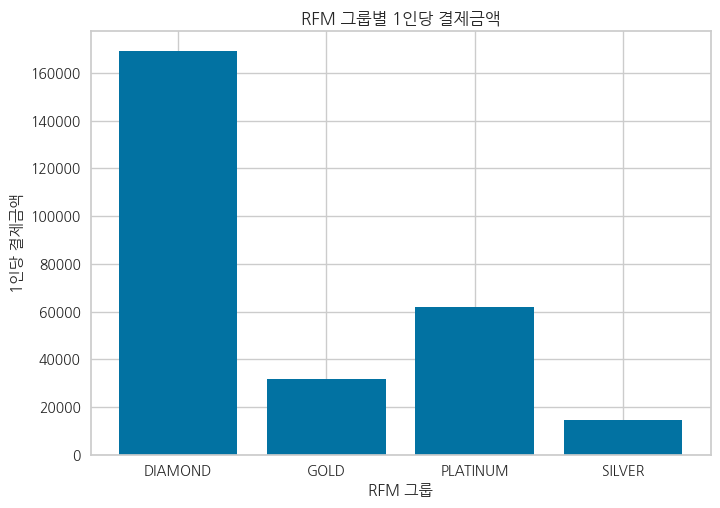

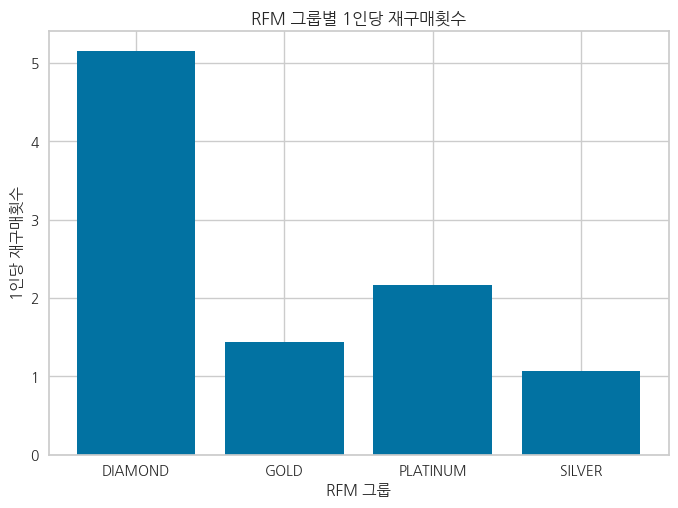

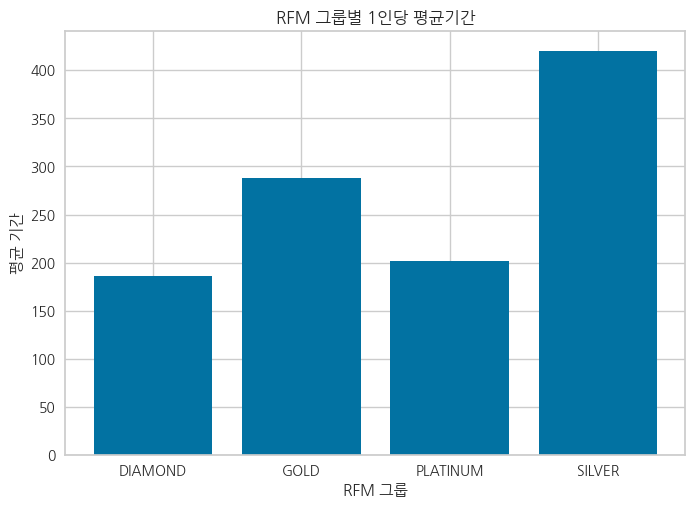

In [12]:
# RFM 그룹별 1인당 결제금액 바 차트
plt.bar(result.index, result['1인당 결제금액'])
plt.title('RFM 그룹별 1인당 결제금액')
plt.xlabel('RFM 그룹')
plt.ylabel('1인당 결제금액')
plt.show()

# RFM 그룹별 1인당 재구매횟수 바 차트
plt.bar(result.index, result['1인당 재구매횟수'])
plt.title('RFM 그룹별 1인당 재구매횟수')
plt.xlabel('RFM 그룹')
plt.ylabel('1인당 재구매횟수')
plt.show()

plt.bar(result.index, result['구매일로부터 평균기간'])
plt.title('RFM 그룹별 1인당 평균기간')
plt.xlabel('RFM 그룹')
plt.ylabel('평균 기간')
plt.show()

In [159]:
df_s = pd.read_csv('./Sales_data_RMF.csv')

/tmp/ipykernel_17609/922523283.py:1: DtypeWarning: Columns (0,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_s = pd.read_csv('./Sales_data_RMF.csv')


In [160]:
df_s.groupby('고객번호')['']

0         False
1         False
2         False
3         False
4         False
          ...  
199994    False
199995    False
199996    False
199997    False
199998    False
Length: 199999, dtype: bool

In [151]:
df_k = df_k[['고객번호','rfm']]

In [152]:
df_sg = pd.merge(df_s, df_k, on='고객번호', how='left')

In [154]:
df_sg.isnull().sum()

주문번호          0
배송완료일         0
배송시작일         0
구매일           0
구매시월령         0
고객번호          0
구매금액          0
결제금액          0
물품대분류         0
상품명           0
포인트           0
배송준비시간        0
배송시간          0
물품중분류         0
물품소분류         0
rfm       66580
dtype: int64

In [162]:
df_sg

,주문번호,배송완료일,배송시작일,구매일,구매시월령,고객번호,구매금액,결제금액,물품대분류,상품명,포인트,배송준비시간,배송시간,물품중분류,물품소분류,rfm
0,901011864201303,2021-01-05,2021-01-01,2020-12-31,35,201901010750089,74560,43825,팬티,하기스 매직핏팬티 5단계 남아 124매(팬티형),30735,1 days,4 days,기저귀,팬티형,PLATINUM
1,901011864430366,2021-01-03,2021-01-01,2020-12-31,9,201901010750143,74560,43825,팬티,하기스 매직핏팬티 3단계 남아 184매(팬티형),30735,1 days,2 days,기저귀,팬티형,PLATINUM
2,81231186197954,2021-01-05,2021-01-01,2020-12-31,22,201812310749820,53920,36769,팬티,하기스 네이처메이드 팬티 5단계 여아 80매(팬티형),17151,1 days,4 days,기저귀,팬티형,DIAMOND
3,812311863500220,2021-01-03,2021-01-01,2020-12-31,8,201812310750007,52160,32408,팬티,하기스 보송보송팬티 4단계 공용 124매(팬티형),19752,1 days,2 days,기저귀,팬티형,DIAMOND
4,812311863220192,2021-01-03,2021-01-01,2020-12-31,23,201812310749977,47360,30066,팬티,하기스 에어솔솔 팬티 5단계 남아용 80매(팬티형),17294,1 days,2 days,기저귀,팬티형,PLATINUM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372620,00806233401-26770461124511,2022-08-11,2022-08-08,2022-08-07,13,201906180918504,21300,14910,FC,라네이처 시그니처 울트라슬림 날개 중형 12개입 (EA),6390,1 days,3 days,생리대,생리대,NaN
372621,00806204436-0461904922687,2022-08-11,2022-08-08,2022-08-07,163,201901280776735,7900,5840,FC,라네이처 시그니처 맥시슬림 날개 중형 12개입 (EA),2060,1 days,3 days,생리대,생리대,RED
372622,00806204436-0461904922688,2022-08-12,2022-08-08,2022-08-07,163,201901280776735,7100,5240,FC,라네이처 시그니처 울트라슬림 날개 대형 10개입 (EA),1860,1 days,4 days,생리대,생리대,RED
372623,00806215930-05281256126202,2022-08-10,2022-08-08,2022-08-07,5,201906200921415,7100,5240,FC,라네이처 시그니처 울트라슬림 날개 소형 14개입 (EA),1860,1 days,2 days,생리대,생리대,RED


In [158]:
df_sg.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
372620    False
372621    False
372622    False
372623    False
372624    False
Length: 372625, dtype: bool